This is an ANN model test using the road, bus and rail data produced in test1

In [1]:
#DATA LOAD CELL - and make up the inputs and targets
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df_raildataOiDj = pd.read_csv('raildata_OiDj.csv')
#df_busdataOiDj = pd.read_csv('busdata_OiDj.csv')
#df_roaddataOiDj = pd.read_csv('roaddata_OiDj.csv')

#inputs = df_raildataOiDj[["net_i", "net_j"]].to_numpy(dtype="float")

#these work!
inputs = df_raildataOiDj[["net_i", "net_j", "net_secs", "savedSecsRail", "net_i_Oi_rail", "net_i_Oi_all", "net_j_Dj_rail", "net_j_Dj_all"]].to_numpy(dtype="float")
#inputs = df_raildataOiDj[["net_i", "net_j", "net_secs", "net_i_Oi_rail", "net_i_Oi_all", "net_j_Dj_rail", "net_j_Dj_all"]].to_numpy(dtype="float")
targets = df_raildataOiDj["CkDiffRail"].to_numpy(dtype="float").reshape( (-1,1) )
###
#inputs = df_busdataOiDj[["net_i", "net_j", "net_secs", "savedSecsBus", "net_i_Oi_bus", "net_i_Oi_all", "net_j_Dj_bus", "net_j_Dj_all"]].to_numpy(dtype="float")
#targets = df_busdataOiDj["CkDiffBus"].to_numpy(dtype="float").reshape( (-1,1) )
###
#inputs = df_roaddataOiDj[["net_i", "net_j", "net_secs", "SavedSecsRoad", "net_i_Oi_road", "net_i_Oi_all", "net_j_Dj_road", "net_j_Dj_all"]].to_numpy(dtype="float")
#targets = df_roaddataOiDj["CkDiffRoad"].to_numpy(dtype="float").reshape( (-1,1) )



#normalise
iscaler = StandardScaler()
iscaler.fit(inputs)
tscaler = StandardScaler()
tscaler.fit(targets)
inputs = iscaler.transform(inputs)
targets = tscaler.transform(targets)

np.savetxt('ann_inputs.csv',inputs,delimiter=',',fmt='%g')
np.savetxt('ann_targets.csv',targets,delimiter=',',fmt='%g')

print('inputs shape=',inputs.shape)
print(inputs.dtype)
print('targets shape=',targets.shape)
print(targets.dtype)

#more exotic stuff
#df_raildataOiDj.describe().transpose()
#sns.pairplot(df_raildataOiDj[['net_i', 'net_j', 'CkDiffRail']], diag_kind='kde')
##sns.pairplot(df_raildataOiDj[['net_secs', 'net_i_Oi_rail', 'net_j_Dj_rail', 'CkDiffRail']], diag_kind='kde')


inputs shape= (175793, 8)
float64
targets shape= (175793, 1)
float64


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 1024)           │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,273 (200.29 KB)

 Trainable params: 51,273 (200.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.4619 - mean_squared_error: 0.4619 - val_loss: 0.3033 - val_mean_squared_error: 0.3033
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1354 - mean_squared_error: 0.1354 - val_loss: 0.2758 - val_mean_squared_error: 0.2758
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.2357 - val_mean_squared_error: 0.2357
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1024 - mean_squared_error: 0.1024 - val_loss: 0.2444 - val_mean_squared_error: 0.2444
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0963 - mean_squared_error: 0.0963 - val_loss: 0.2406 - val_mean_squared_error: 0.2406
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.2557 - val_mean_squared_error: 0.2557
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.23

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R-Squared =  0.6794814361364759


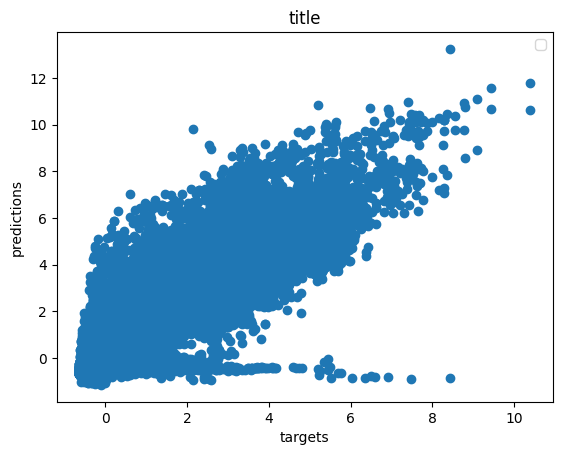

In [7]:
#MODEL CELL - run it here using inputs and targets from previous cell
#https://www.tensorflow.org/tutorials/keras/regression
import os

os.environ["KERAS_BACKEND"] = "tensorflow" #NOTE: you can use JAX as a backend too

import keras
from keras import layers

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score

#model = keras.Sequential()
#model.add(keras.layers.Input(shape=(2,)))
#model.add(keras.layers.Dense(10))
#model.add(keras.layers.Dense(1,activation='linear'))

#model = keras.Sequential([
#    keras.Input(shape=(None, None, 3)),
#    keras.layers.Conv2D(filters=32, kernel_size=3),
#])

model = keras.Sequential(
     [
         keras.layers.Input(shape=(inputs.shape[1],)),
         #keras.layers.Normalization(axis=None),
         keras.layers.Dense(units=1024, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=8, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         ###
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=256, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=1, activation='linear')
     ]
)

model.summary()

my_loss = keras.losses.MeanSquaredError()
my_metric = keras.metrics.MeanSquaredError()

model.compile(
    #loss=keras.losses.MeanSquaredError,
    loss=my_loss,
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    #optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    #optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    #metrics=[
    #    keras.metrics.MeanSquaredError(name="MSE"),
    #],
    metrics = [ my_metric ]
)

batch_size = 8192
epochs = 100

callbacks = [
    #keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    #keras.callbacks.EarlyStopping(monitor="val_loss", patience=25),
]

model.fit(
    inputs,
    targets,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.45, #0.15,
    callbacks=callbacks,
)
score = model.evaluate(inputs, targets, verbose=0)
print(score)

model.save("final_model.keras") #model = keras.saving.load_model("final_model.keras")

predictions = model.predict(inputs)
r2 = r2_score(y_true=targets, y_pred=predictions)
print("R-Squared = ",r2)
plt.scatter(targets,predictions)
plt.title("title")
plt.xlabel("targets")
plt.ylabel("predictions")
#plt.plot([np.min(targets),np.max(targets)],[np.min(targets),np.max(targets)],color='green')
plt.legend()
plt.show
plt.savefig('output.png')
